In [1]:
import numpy as np
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.style as mplstyle

import seaborn as sns

import glob


In [2]:
plt.style.use('default')
sns.set_theme(context='paper', style='white', palette='viridis', font='serif',
            font_scale=2, color_codes=True, rc={'text.usetex' : True})
mplstyle.use('fast')

In [3]:
DATA_PATH = "../output/"

# DATA_DIR = "Homo_sin_poly_test_linear_grad_strat_adabelief_no_bias_min_4_max_64_5_5_25000_100_0.0001_runs_10"
# DATA_DIR = "Hetero_sin_relu_tanh_poly_test_linear_grad_strat_adabelief_no_bias_min_4_max_64_5_5_25000_100_0.0001_runs_10"
# DATA_DIR= "Homo_sin_poly_probablistic_strat_adabelief_no_bias_min_4_max_64_5_5_25000_100_0.0001_runs_10"
# DATA_DIR = "Hetero_sin_relu_tanh_poly_normalized_probablistic_strat_adabelief_no_bias_min_4_5_5_25000_100_0.0001_runs_50"
DATA_DIR = "Hetero_sin_relu_tanh_poly_bare_probablistic_only_add_strat_adabelief_no_bias_min_4_5_5_25000_100_0.0001_runs_50"

In [30]:
run_dirs = glob.glob(DATA_PATH+ DATA_DIR + "/run_*")
run_dirs = [run for run in run_dirs if run.split("_")[-1] != "33"]

In [31]:
run_dirs.sort()
run_dirs

['../output/Hetero_sin_relu_tanh_poly_bare_probablistic_only_add_strat_adabelief_no_bias_min_4_5_5_25000_100_0.0001_runs_50/run_0',
 '../output/Hetero_sin_relu_tanh_poly_bare_probablistic_only_add_strat_adabelief_no_bias_min_4_5_5_25000_100_0.0001_runs_50/run_1',
 '../output/Hetero_sin_relu_tanh_poly_bare_probablistic_only_add_strat_adabelief_no_bias_min_4_5_5_25000_100_0.0001_runs_50/run_10',
 '../output/Hetero_sin_relu_tanh_poly_bare_probablistic_only_add_strat_adabelief_no_bias_min_4_5_5_25000_100_0.0001_runs_50/run_11',
 '../output/Hetero_sin_relu_tanh_poly_bare_probablistic_only_add_strat_adabelief_no_bias_min_4_5_5_25000_100_0.0001_runs_50/run_12',
 '../output/Hetero_sin_relu_tanh_poly_bare_probablistic_only_add_strat_adabelief_no_bias_min_4_5_5_25000_100_0.0001_runs_50/run_13',
 '../output/Hetero_sin_relu_tanh_poly_bare_probablistic_only_add_strat_adabelief_no_bias_min_4_5_5_25000_100_0.0001_runs_50/run_14',
 '../output/Hetero_sin_relu_tanh_poly_bare_probablistic_only_add_strat_

In [43]:
neuron_history = [np.loadtxt(run_dir + "/neurons.txt") for run_dir in run_dirs]

In [ ]:
first_removal_history = []
for neurons in neuron_history:
    diff = np.diff(neurons)
    try:
        index = np.where(diff < 0)[0][0] + 1
    except IndexError:
        index = np.nan
    first_removal_history.append(index)


In [ ]:
non_removal_density = np.isnan(first_removal_history).sum()/len(first_removal_history)

In [ ]:
non_removal_density

0.0

Text(0.5, 1.0, 'first neuron removal epoch')

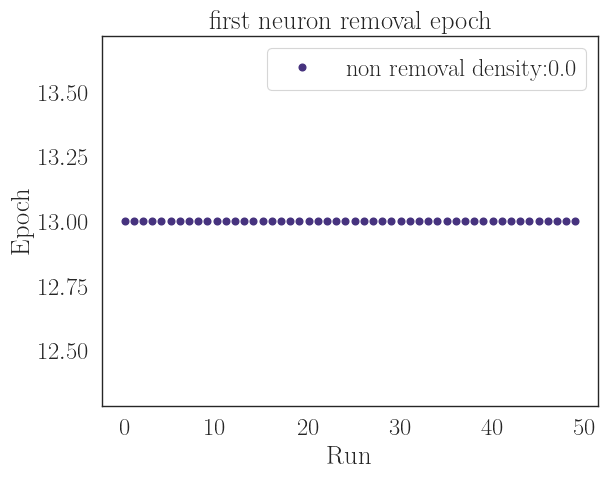

In [ ]:
plt.plot(first_removal_history, "o", label=f"non removal density:{non_removal_density}")
plt.ylabel("Epoch")
plt.xlabel("Run")
plt.legend()
plt.title("first neuron removal epoch")


In [ ]:
removal_history = np.loadtxt(DATA_PATH + DATA_DIR + "/first_removal_history.txt")

In [ ]:
epoch, n_neurons, train_loss, test_loss =  removal_history.T

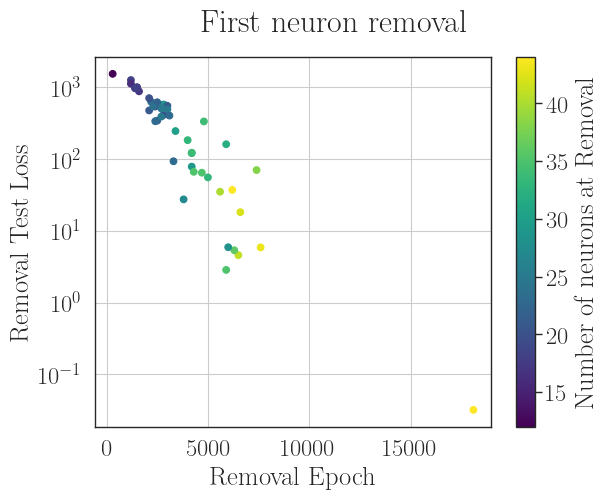

In [ ]:
# fig = plt.figure(figsize=(10, 10))
plt.scatter(epoch, test_loss, c=n_neurons, cmap='viridis')
plt.xlabel('Removal Epoch')
plt.ylabel('Removal Test Loss')
plt.colorbar(label='Number of neurons at Removal')
plt.yscale('log')
plt.grid()
plt.suptitle('First neuron removal')
plt.show()

In [ ]:
from scipy import stats 

first_removal_mode = stats.mode(first_removal_history, nan_policy= "omit")

In [ ]:
first_removal_mode

ModeResult(mode=13, count=50)

In [32]:
train_loss_history = [np.loadtxt(run_dir + "/train_loss.txt") for run_dir in run_dirs]
test_loss_history = [np.loadtxt(run_dir + "/test_loss.txt") for run_dir in run_dirs]

In [33]:
# filter failed runs where final loss > 0.1
failed_runs = [i for i, test_loss in enumerate(test_loss_history) if test_loss[-1][-1] > 10]
failure_density = len(failed_runs)/len(test_loss_history)
print(f"failure density: {failure_density}")

failure density: 0.0


In [34]:
# remove failed runs from run_dirs
new_run_dirs = [run_dir for i, run_dir in enumerate(run_dirs) if i not in failed_runs]

In [50]:
y_pred_history = [np.loadtxt(run_dir + "/y_pred.txt") for run_dir in run_dirs]
y_pred_mean = np.mean(y_pred_history, axis = 0)
y_pred_std = np.std(y_pred_history, axis = 0)

In [51]:
def poly(x):
    return (x - 3)*(x - 2)*(x - 1)*x*(x + 1)*(x + 2)*(x + 3)

x = np.linspace(-3, 3, 20000).reshape(-1, 1)
y = poly(x)

_, x, _, y = train_test_split(x, y, test_size=0.2, random_state=0)

In [52]:
x = x.flatten()
y = y.flatten()
y_pred_mean = y_pred_mean.flatten()
y_pred_std = y_pred_std.flatten()

sort_indices = np.argsort(x)

# Use these indices to sort x, y, y_pred_mean, and y_pred_std
x = x[sort_indices]
y = y[sort_indices]
y_pred_mean = y_pred_mean[sort_indices]
y_pred_std = y_pred_std[sort_indices]


In [53]:
x.shape, y.shape

((4000,), (4000,))

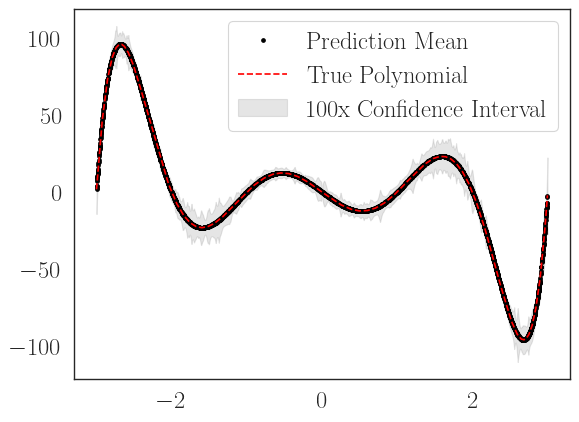

In [54]:
plt.plot(x, y_pred_mean, ".", label='Prediction Mean', color='k')
plt.plot(x, y, 'r--' ,label='True Polynomial')
plt.fill_between(x, y_pred_mean - 100*y_pred_std, y_pred_mean + 100* y_pred_std, color='grey', alpha=0.2, label='100x Confidence Interval')
plt.legend()
plt.savefig("prediction.png")
plt.savefig("prediction.pdf")
plt.savefig("prediction.svg", format='svg', bbox_inches='tight')
plt.show()

In [40]:
epochs, losses = zip(*train_loss_history[0])

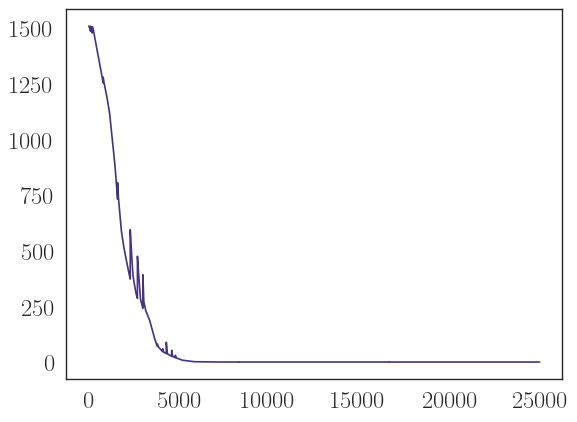

In [41]:
plt.plot(epochs, losses)

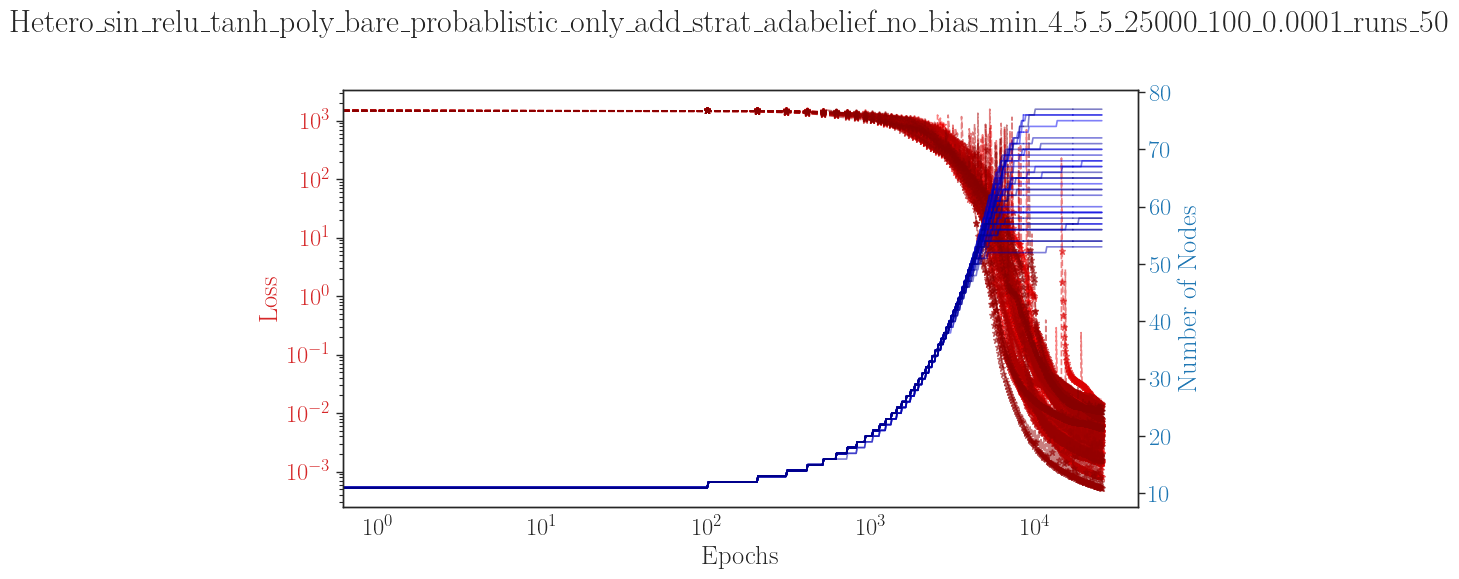

In [44]:
fig, ax1 = plt.subplots(figsize=(10, 6))

loss_color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color=loss_color)
ax1.tick_params(axis='y', labelcolor=loss_color)
ax1.set_yscale("log")
ax1.set_xscale("log")
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

neuron_color = 'tab:blue'
ax2.set_ylabel('Number of Nodes', color=neuron_color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=neuron_color)

hue_loss = 0
hue_neuron = 2/3
saturation = 1.0
value = 1.0

for i,_ in enumerate(train_loss_history):
    test_epoch, test_loss = zip(*test_loss_history[i])
    train_epoch, train_loss = zip(*train_loss_history[i])
    neuron_epoch, neurons = zip(*neuron_history[i])

    # Convert the hue, saturation, and value to RGB
    loss_color = colors.hsv_to_rgb((hue_loss, saturation, value))
    neuron_color = colors.hsv_to_rgb((hue_neuron, saturation, value))

    ax1.plot(train_epoch, train_loss, "--", color=loss_color, alpha=0.5)
    ax1.plot(test_epoch, test_loss, "*", color=loss_color, alpha=0.5)
    ax2.plot(neuron_epoch, neurons, "-", color=neuron_color, alpha=0.5)

    # Update the hue for the next iteration
    # hue = (hue + 1.0 / len(train_loss_history)) % 1.0
    value = 1.0 - (i / len(train_loss_history)) * 0.5 


plt.suptitle(DATA_DIR)
fig.tight_layout()

In [45]:
final_shape = [np.loadtxt(run_dir + "/final_shape.txt") for run_dir in run_dirs]
final_adjacency_matrix = [np.loadtxt(run_dir + "/final_adjacency_matrix.txt") for run_dir in run_dirs]

In [46]:
adj = final_adjacency_matrix[0]
shape = final_shape[0].astype(int)

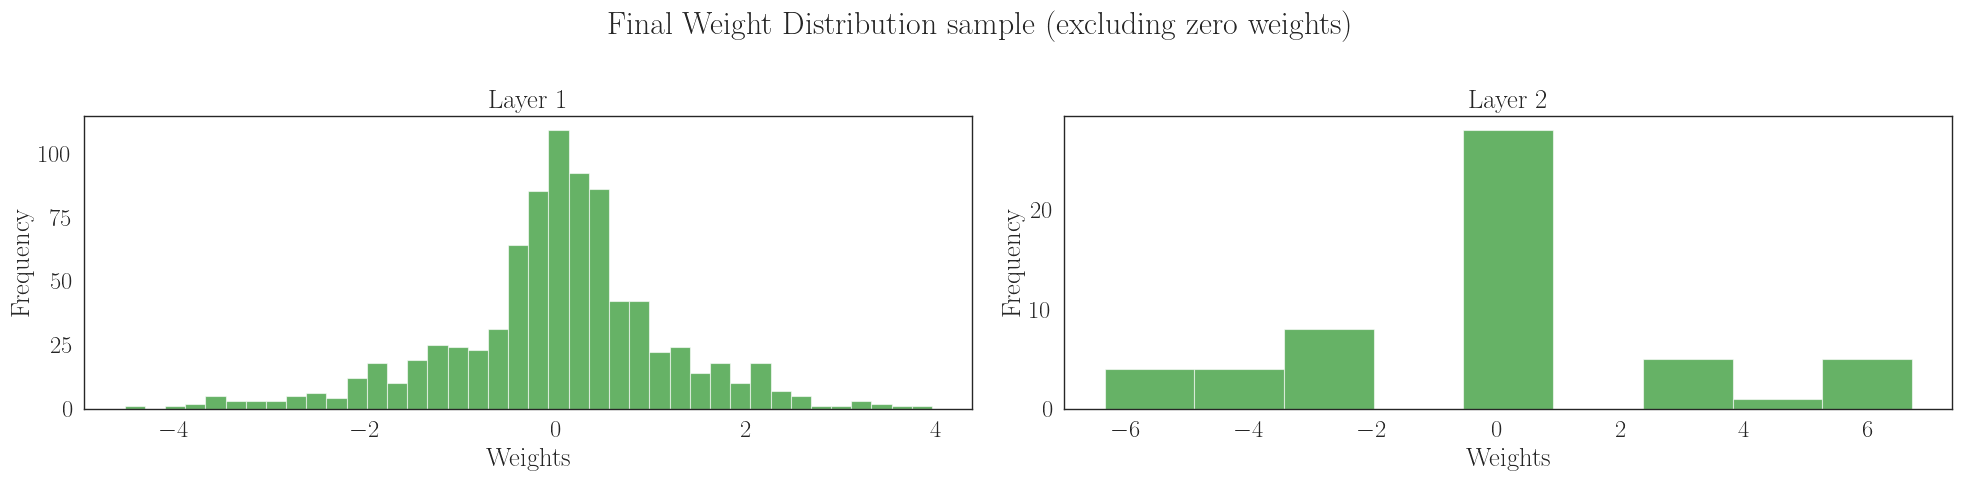

In [47]:
sub_matrices = np.split(adj, np.cumsum(shape)[:-1])[:-1]

fig, axs = plt.subplots(1, len(sub_matrices), figsize=(20, 5))

for i, (sub_matrix, ax) in enumerate(zip(sub_matrices, axs), start=1):
    weights = sub_matrix.flatten()
    weights = weights[weights != 0]
    ax.hist(weights, bins="auto", density=False, alpha=0.6, color='g')
    ax.set_xlabel('Weights')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Layer {i}')

# Display the figure with its subplots
plt.suptitle('Final Weight Distribution sample (excluding zero weights)')
plt.tight_layout()
plt.show()

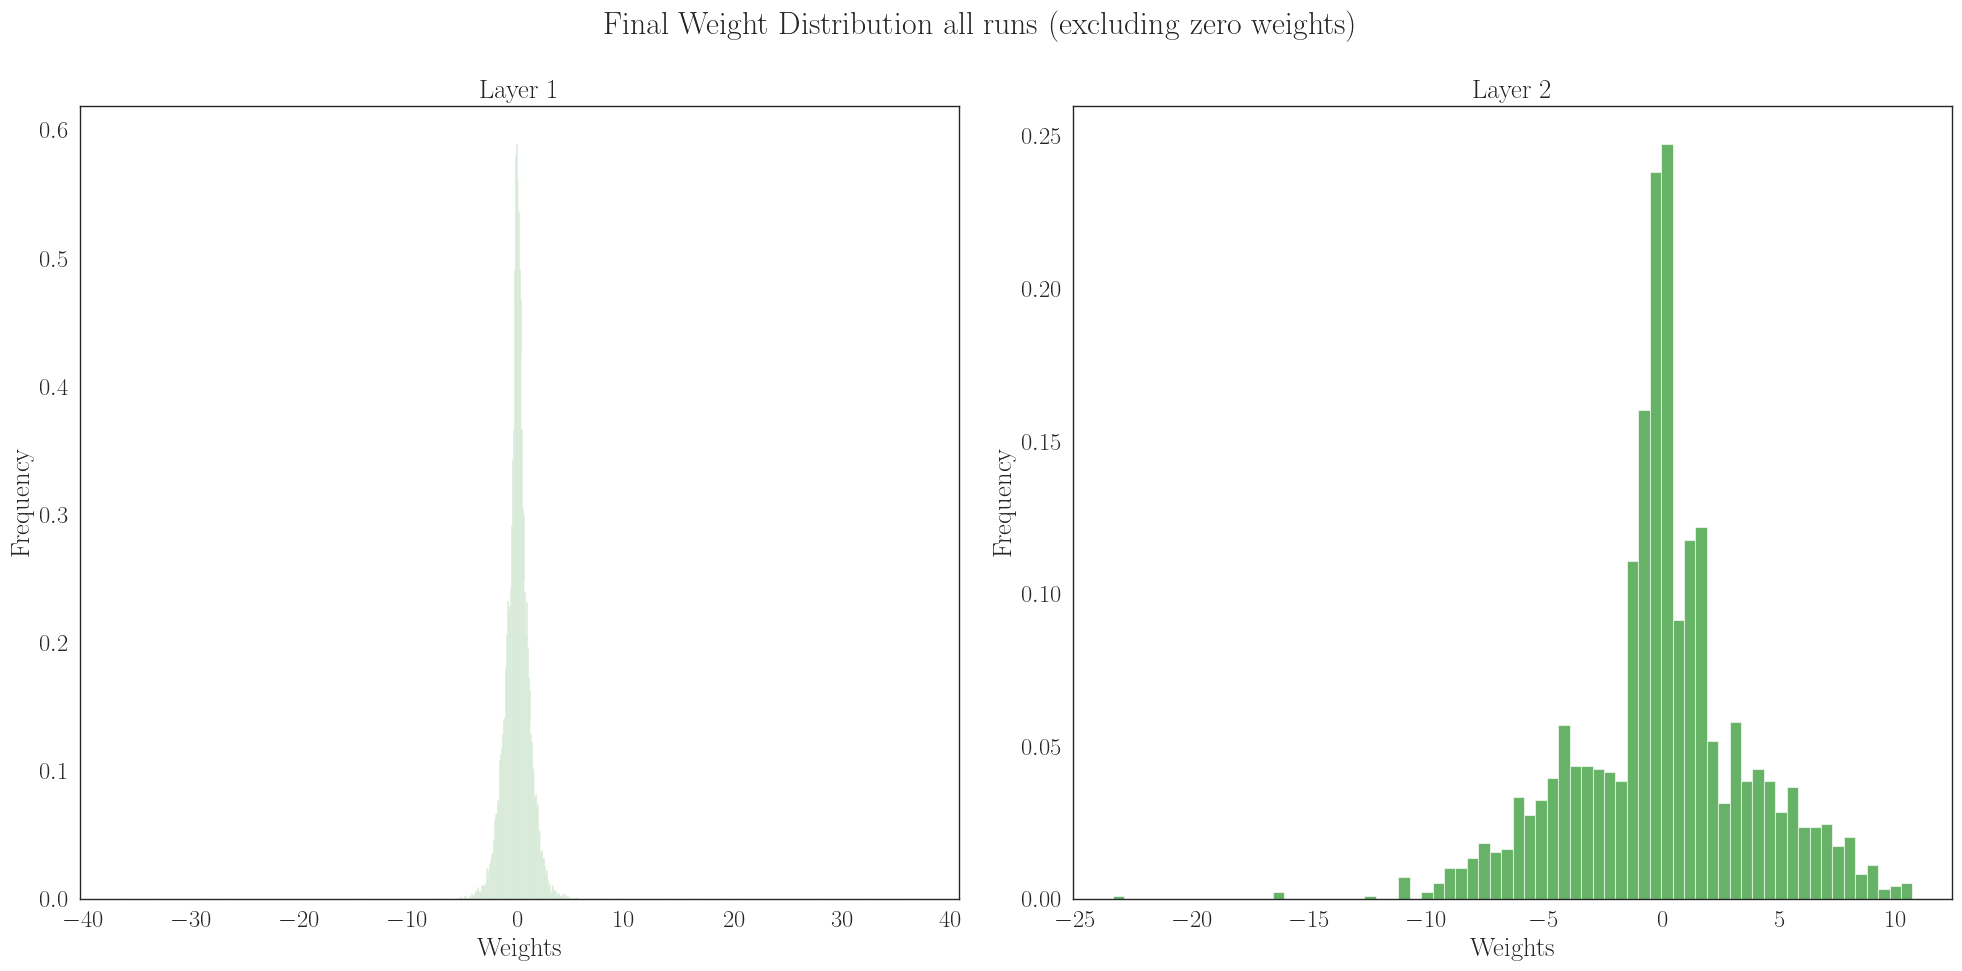

In [48]:
weights_by_layer = []

# For each adjacency matrix and its corresponding layer sizes
for adjacency_matrix, layer_sizes in zip(final_adjacency_matrix, final_shape):
    shape = layer_sizes.astype(int)
    # Split the adjacency matrix into sub-matrices
    sub_matrices = np.split(adjacency_matrix, np.cumsum(shape)[:-1])[:-1]

    # For each sub-matrix, add its flattened weights to the corresponding sublist in weights_by_layer
    for i, sub_matrix in enumerate(sub_matrices):
        # Flatten the sub-matrix and filter out the zeros
        weights = sub_matrix.flatten()
        weights = weights[weights != 0]

        if i >= len(weights_by_layer):
            # If the sublist does not exist yet, create it
            weights_by_layer.append(list(weights))
        else:
            # If the sublist already exists, append to it
            weights_by_layer[i].extend(weights)


# For each sublist in weights_by_layer, plot a histogram of the weights
fig, axs = plt.subplots(1, len(weights_by_layer), figsize=(20, 10))
for i, (weights, ax) in enumerate(zip(weights_by_layer, axs), start=1):
    ax.hist(weights, bins="auto", density=True, alpha=0.6, color='g')
    ax.set_xlabel('Weights')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Layer {i}')

# Display the figure with its subplots
plt.suptitle('Final Weight Distribution all runs (excluding zero weights)')
plt.tight_layout()
plt.show()

In [49]:
weights_by_layer

[[1.0080238580703735,
  -0.47932690382003784,
  -0.3908109962940216,
  2.803049087524414,
  -0.6972893476486206,
  -3.082066774368286,
  -2.086276054382324,
  -0.45828062295913696,
  -0.9570035934448242,
  -0.14345426857471466,
  1.3109902143478394,
  1.2086728811264038,
  1.0527147054672241,
  -0.279116690158844,
  -0.745350182056427,
  1.9038000106811523,
  0.38705000281333923,
  -2.8187050819396973,
  -1.0404380559921265,
  -1.083236813545227,
  0.22875289618968964,
  0.3288903832435608,
  -0.0025344621390104294,
  -0.7973105907440186,
  -1.249101161956787,
  -0.99578857421875,
  -0.3718116283416748,
  0.21161703765392303,
  -0.5526458024978638,
  0.12688305974006653,
  -0.008880090899765491,
  3.961751699447632,
  -0.2588330805301666,
  0.1617881953716278,
  -0.7206679582595825,
  -1.8858420848846436,
  1.2795933485031128,
  1.3822526931762695,
  -1.4821189641952515,
  0.0018602150958031416,
  -0.16246773302555084,
  1.8513834476470947,
  -0.3317744731903076,
  0.6835340261459351,
